# Aufgabe 3: Faltung
Ein wichtiger Basisalgorithmus in der Bildverarbeitung ist die diskrete Faltung
\begin{align}
 I_A(i,j) = (I * A)(i, j) = \sum_{h=-\lfloor \frac{m}{2} \rfloor}^{ \lfloor \frac{m}{2} \rfloor} \sum_{k=-\lfloor \frac{n}{2} \rfloor}^{ \lfloor \frac{n}{2} \rfloor} A(h,k) \cdot I(i-h, j-k).
 \label{eqn:lin_filt}
\end{align}

Hierbei wird eine Faltungsmaske $A \in \mathbb{R}^{m \times n}$ verwendet und über das Eingabebild $I$ "geschoben".
Dabei wird für jedes Pixel des Eingabebildes eine mit den korrespondierenden Einträgen der Faltungsmaske gewichtete Linearkombination der Nachbarschaftspixel berechnet.
Verschiedene Faltungsmasken haben dabei unterschiedliche Auswirkungen auf das Bild.

Eine einfache Faltungsmaske ist z. B. der Mittelwertfilter $A_\text{avg}$, der für eine
Größe $m=n=3$ die folgende Form hat:

\begin{equation}
 A_\text{avg} = \frac{1}{9} \left(\begin{array}{ccc}1&1&1\\1&1&1\\1&1&1\end{array}\right).
\end{equation}

Schreiben Sie eine Python-Funktion, eine beliebige Filtermaske $A \in \mathbb{R}^{m \times n}$ auf ein Bild anwendet, und testen Sie diese mit obigem Mittelwertfilter $A_\text{avg}$!
Überlegen Sie sich ein Vorgehen bei der Behandlung der an den Bildrändern gelegenen Pixeln!

## 0. Pfade, Pakete etc.

In [121]:
import glob
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt

import imageio
import numpy as np

In [122]:
image_filter = 'Bilder/*.jpg'

## 1. Definition der Faltungsmaske
Definieren Sie hier die Faltungsmaske `A_avg` für den Mittelwertfilter!

In [123]:
A_avg = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]).astype(np.float32) / 9

## 2. Laden des Bildes

In [124]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

Für diese Aufgabe ist es wichtig, das Bild im Fließkommaformat vorliegen zu haben. Konvertieren sie `image` zu einer geeigneten Repräsentation:

In [125]:
image = np.asarray(image, dtype=np.float32) / 255

## 3. Berechung der Faltung
Definieren Sie eine Funktion `ex2_convolve`, die ein Bild sowie eine Faltungsmaske übergeben bekommt und als Rückgabewert das gefaltete Bild liefert. Denken Sie an ein sinnvolles Vorgehen zur Behandlung der Bildränder.

In [126]:
def pad_pixel(image, i, j):
    # find nearest pixel that is still in the image
    i = max(i, 0)
    i = min(i, image.shape[0] - 1)
    j = max(j, 0)
    j = min(j, image.shape[1] - 1)
    return image[i, j]

def fold_pixel(image, filter_mask, i, j):
    m = filter_mask.shape[0]
    n = filter_mask.shape[1]
    m_offset = m // 2
    n_offset = n // 2
    new_pixel = 0
    # [-m/2, m/2]
    for h in range(m):
        # [-n/2, n/2]
        for k in range(n):
            new_pixel += filter_mask[h, k] * pad_pixel(image, i - h + m_offset, j - k + n_offset)
    return new_pixel

def ex2_convolve(image, filter_mask):
    convolved_image = np.zeros_like(image)
    for i, j in np.ndindex(image.shape):
        convolved_image[i, j] = fold_pixel(image, filter_mask, i, j)
    return convolved_image


Nun wird das gefaltete Bild mit Hilfe der Funktion berechnet:

In [127]:
convolved_image = ex2_convolve(image, A_avg)

## 4. Darstellung
Um die Wirksamkeit der Faltung zu überprüfen, stellen Sie `image` und `convolved_image` nebeneinander dar:

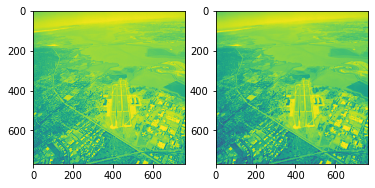

In [128]:
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(convolved_image)
plt.show()